In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Uploading the datasets
from google.colab import files
uploaded=files.upload()

Saving friday.csv to friday.csv
Saving monday.csv to monday.csv
Saving thursday.csv to thursday.csv
Saving tuesday.csv to tuesday.csv
Saving wednesday.csv to wednesday.csv


In [ ]:
#Reading all datasets
mon=pd.read_csv('monday.csv', sep=';')
tue=pd.read_csv('tuesday.csv', sep=';')
wed=pd.read_csv('wednesday.csv', sep=';')
thu=pd.read_csv('thursday.csv', sep=';')
fri=pd.read_csv('friday.csv', sep=';')

In [ ]:
#Copying the datasets
mon_id=mon.copy()
tue_id=tue.copy()
wed_id=wed.copy()
thu_id=thu.copy()
fri_id=fri.copy()

In [ ]:
#Checking one dataset
mon_id.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [ ]:
#Sorting the data by customer no and timestampcolumn
mon_id=mon_id.sort_values(by=['customer_no', 'timestamp'])
tue_id=tue_id.sort_values(by=['customer_no', 'timestamp'])
wed_id=wed_id.sort_values(by=['customer_no', 'timestamp'])
thu_id=thu_id.sort_values(by=['customer_no', 'timestamp'])
fri_id=fri_id.sort_values(by=['customer_no', 'timestamp'])

In [ ]:
#Checking the dataset after sorting 
mon_id.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
8,2019-09-02 07:05:00,1,checkout
1,2019-09-02 07:03:00,2,dairy
12,2019-09-02 07:06:00,2,checkout
2,2019-09-02 07:04:00,3,dairy


- After sorting the dataset, If we analyse first customer, he/she directly enter into dairy and then checked out. 

In [ ]:
#Checking the number of rows and columns
mon_id.shape

(4884, 3)

In [ ]:
#Checking another dataset - number of rows and columns
tue_id.shape

(4714, 3)

It shows the number of rows and columns are different in different datasets

In [ ]:
#Checking another dataset
tue_id.head()

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
3,2019-09-03 07:05:00,1,drinks
25,2019-09-03 07:12:00,1,checkout
1,2019-09-03 07:02:00,2,drinks
34,2019-09-03 07:14:00,2,fruit


In [ ]:
#Checking another dataset
wed_id.head()

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1,fruit
9,2019-09-04 07:02:00,1,checkout
1,2019-09-04 07:00:00,2,dairy
23,2019-09-04 07:05:00,2,spices
25,2019-09-04 07:06:00,2,checkout


In [ ]:
#Checking other dataset
thu_id.head()

,timestamp,customer_no,location
0,2019-09-05 07:00:00,1,drinks
4,2019-09-05 07:02:00,1,checkout
1,2019-09-05 07:01:00,2,fruit
9,2019-09-05 07:05:00,2,checkout
2,2019-09-05 07:01:00,3,dairy


In [ ]:
#Checking other dataset
fri_id.head()

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1,dairy
12,2019-09-06 07:04:00,1,spices
15,2019-09-06 07:05:00,1,checkout
1,2019-09-06 07:00:00,2,drinks
3,2019-09-06 07:01:00,2,checkout


- Though the number of rows and columns are different, however the contents are similar through out all the dataset. The dataset contains columns of timestamp, customer_no, and location.

- Customer no.are given anonomously to the customers. Locations indicate the different eisles of the departmental store.

- the customer no of next day does not indicate any of the customer from previous day.

In [ ]:
#transforming the customers no. unique
mon_id["customer_no"] = mon_id["customer_no"].apply(lambda x:"monday" + " "  + str(x))
tue_id["customer_no"] = tue_id["customer_no"].apply(lambda x:"tuesday" + " "  + str(x))
wed_id["customer_no"] = wed_id["customer_no"].apply(lambda x:"wednesday" + " "  + str(x))
thu_id["customer_no"] = thu_id["customer_no"].apply(lambda x:"thursday" + " "  + str(x))
fri_id["customer_no"] = fri_id["customer_no"].apply(lambda x:"friday" + " "  + str(x))

In [ ]:
#Shifting one state to define the next_state
mon_id['next_state']=mon_id['location'].shift(-1)
tue_id['next_state']=tue_id['location'].shift(-1)
wed_id['next_state']=wed_id['location'].shift(-1)
thu_id['next_state']=thu_id['location'].shift(-1)
fri_id['next_state']=fri_id['location'].shift(-1)


In [ ]:
#Concating all columns to one single dataframe week
week=pd.concat([mon_id, tue_id, wed_id, thu_id, fri_id],  axis=0)
week

,timestamp,customer_no,location,next_state
0,2019-09-02 07:03:00,monday 1,dairy,checkout
8,2019-09-02 07:05:00,monday 1,checkout,dairy
1,2019-09-02 07:03:00,monday 2,dairy,checkout
12,2019-09-02 07:06:00,monday 2,checkout,dairy
2,2019-09-02 07:04:00,monday 3,dairy,checkout
...,...,...,...,...
5121,2019-09-06 21:50:00,friday 1507,checkout,dairy
5114,2019-09-06 21:48:00,friday 1508,dairy,checkout
5122,2019-09-06 21:50:00,friday 1508,checkout,drinks
5123,2019-09-06 21:50:00,friday 1509,drinks,spices


In [ ]:
#developing a transition matrix to develop the probability of moving from one eisle to another by the customer
P = pd.crosstab(
    week['location'], 
    week['next_state'], normalize='index')
P

next_state,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0.000000,0.287390,0.153338,0.377613,0.181659
dairy,0.390124,0.001283,0.222745,0.190252,0.195596
drinks,0.536748,0.027145,0.000000,0.219206,0.216901
fruit,0.498926,0.238039,0.136887,0.000391,0.125757
spices,0.250733,0.323741,0.272848,0.152411,0.000266


# One suggestion from Jens, in the check out=chekout = 1 and for the rest of with others aisles = 0 so that the customer can't go back to any other aisles from checkout 

In [ ]:
#Converting the probability into a dictionary
prob=P.to_dict(orient='index')
prob

{'checkout': {'checkout': 0.0,
  'dairy': 0.28739042481456506,
  'drinks': 0.1533378287255563,
  'fruit': 0.37761294672960216,
  'spices': 0.18165879973027646},
 'dairy': {'checkout': 0.3901239846088072,
  'dairy': 0.0012825994014536127,
  'drinks': 0.22274476271911073,
  'fruit': 0.19025224454895254,
  'spices': 0.19559640872167594},
 'drinks': {'checkout': 0.5367477592829706,
  'dairy': 0.02714468629961588,
  'drinks': 0.0,
  'fruit': 0.21920614596670934,
  'spices': 0.21690140845070421},
 'fruit': {'checkout': 0.49892599101737944,
  'dairy': 0.23803944542081626,
  'drinks': 0.13688732669400508,
  'fruit': 0.0003905487209529389,
  'spices': 0.12575668814684632},
 'spices': {'checkout': 0.2507327471356248,
  'dairy': 0.3237410071942446,
  'drinks': 0.2728483879563016,
  'fruit': 0.15241140420996535,
  'spices': 0.0002664535038635758}}

In [ ]:
for key in prob.keys():
  prob[key]= list(prob[key].values())

prob

{'checkout': [0.0,
  0.28739042481456506,
  0.1533378287255563,
  0.37761294672960216,
  0.18165879973027646],
 'dairy': [0.3901239846088072,
  0.0012825994014536127,
  0.22274476271911073,
  0.19025224454895254,
  0.19559640872167594],
 'drinks': [0.5367477592829706,
  0.02714468629961588,
  0.0,
  0.21920614596670934,
  0.21690140845070421],
 'fruit': [0.49892599101737944,
  0.23803944542081626,
  0.13688732669400508,
  0.0003905487209529389,
  0.12575668814684632],
 'spices': [0.2507327471356248,
  0.3237410071942446,
  0.2728483879563016,
  0.15241140420996535,
  0.0002664535038635758]}

In [ ]:
#Defining the states variable, and taking all possible places, where a customer might be
states=['dairy', 'drinks', 'fruit', 'spices', 'checkout']
current_state='dairy'

In [ ]:
random.choices(states, weights=prob[current_state])

['dairy']

**Exploratory data analysis**

In [ ]:
#Distribution of locations by thecustomer through out the whole week
week['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

- Fruit is the most popular section in the store followed by dairy, drinks and spices
- thoroughout the week total 7417 customers have checked out. So in a week on average that number of customers visit the supermarket

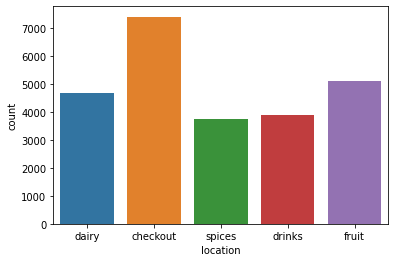

In [ ]:
#Graphical representation of distribution of locations in supermarket
sns.countplot(data=week, x='location')

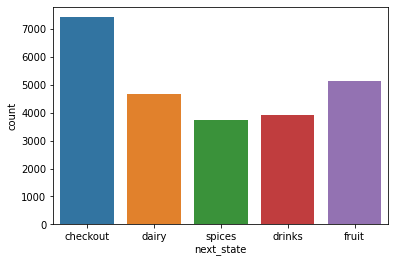

In [ ]:
#Graphical representation of next_state 
sns.countplot(data=week, x='next_state')

In [ ]:
#Creting two separate columns from the timestamp column
week['date']=pd.to_datetime(week['timestamp']).dt.date
week['time']=pd.to_datetime(week['timestamp']).dt.time

In [ ]:
#Changing the datatype of timstamp and date column to datetime
week['timestamp']=pd.to_datetime(week['timestamp'])
week['date']=pd.to_datetime(week['date'])

In [ ]:
week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    24877 non-null  datetime64[ns]
 1   customer_no  24877 non-null  object        
 2   location     24877 non-null  object        
 3   next_state   24872 non-null  object        
 4   date         24877 non-null  datetime64[ns]
 5   time         24877 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 1.8+ MB


In [ ]:
#week['day']=week['date'].dt.day

In [ ]:
#Creating another column hour from timestamp and converting to datetime
week['hour']=week['timestamp'].dt.hour

In [ ]:
#Creating  a week day column
week['weekday']=week['timestamp'].dt.weekday

In [ ]:
# Checking the whole dataset 
week

,timestamp,customer_no,location,next_state,date,time,hour,weekday
0,2019-09-02 07:03:00,monday 1,dairy,checkout,2019-09-02,07:03:00,7,0
8,2019-09-02 07:05:00,monday 1,checkout,dairy,2019-09-02,07:05:00,7,0
1,2019-09-02 07:03:00,monday 2,dairy,checkout,2019-09-02,07:03:00,7,0
12,2019-09-02 07:06:00,monday 2,checkout,dairy,2019-09-02,07:06:00,7,0
2,2019-09-02 07:04:00,monday 3,dairy,checkout,2019-09-02,07:04:00,7,0
...,...,...,...,...,...,...,...,...
5121,2019-09-06 21:50:00,friday 1507,checkout,dairy,2019-09-06,21:50:00,21,4
5114,2019-09-06 21:48:00,friday 1508,dairy,checkout,2019-09-06,21:48:00,21,4
5122,2019-09-06 21:50:00,friday 1508,checkout,drinks,2019-09-06,21:50:00,21,4
5123,2019-09-06 21:50:00,friday 1509,drinks,spices,2019-09-06,21:50:00,21,4


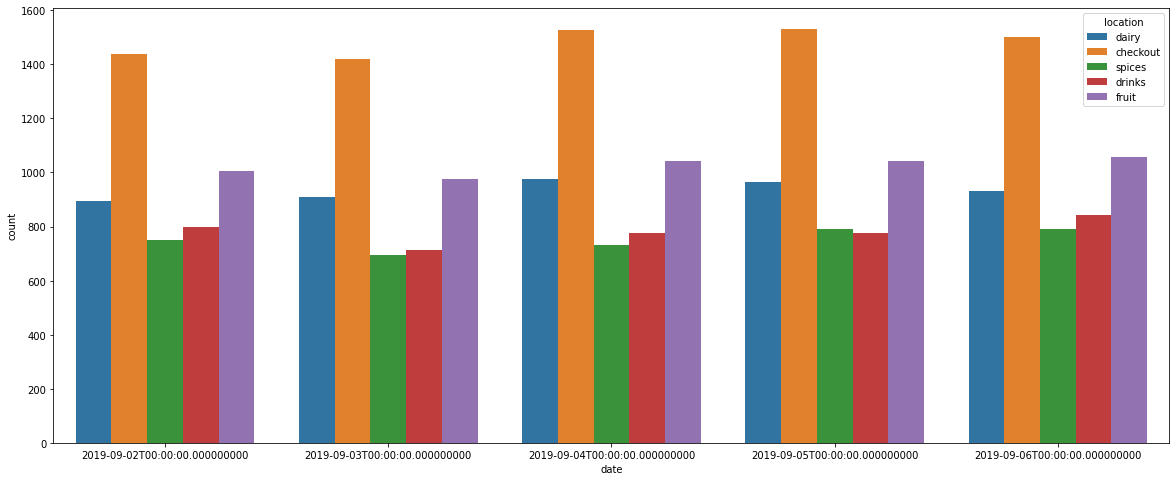

In [ ]:
#Distribution of location by weekday
plt.figure(figsize=(20,8))
sns.countplot(data=week, x='date', hue='location')
plt.show()

- it looks the distribution of customers and locations are almost similar by weekdays. it indicates also almost the same customers visit the supermarket and that supermarket is located in a locality, not near to tourist attraction. 

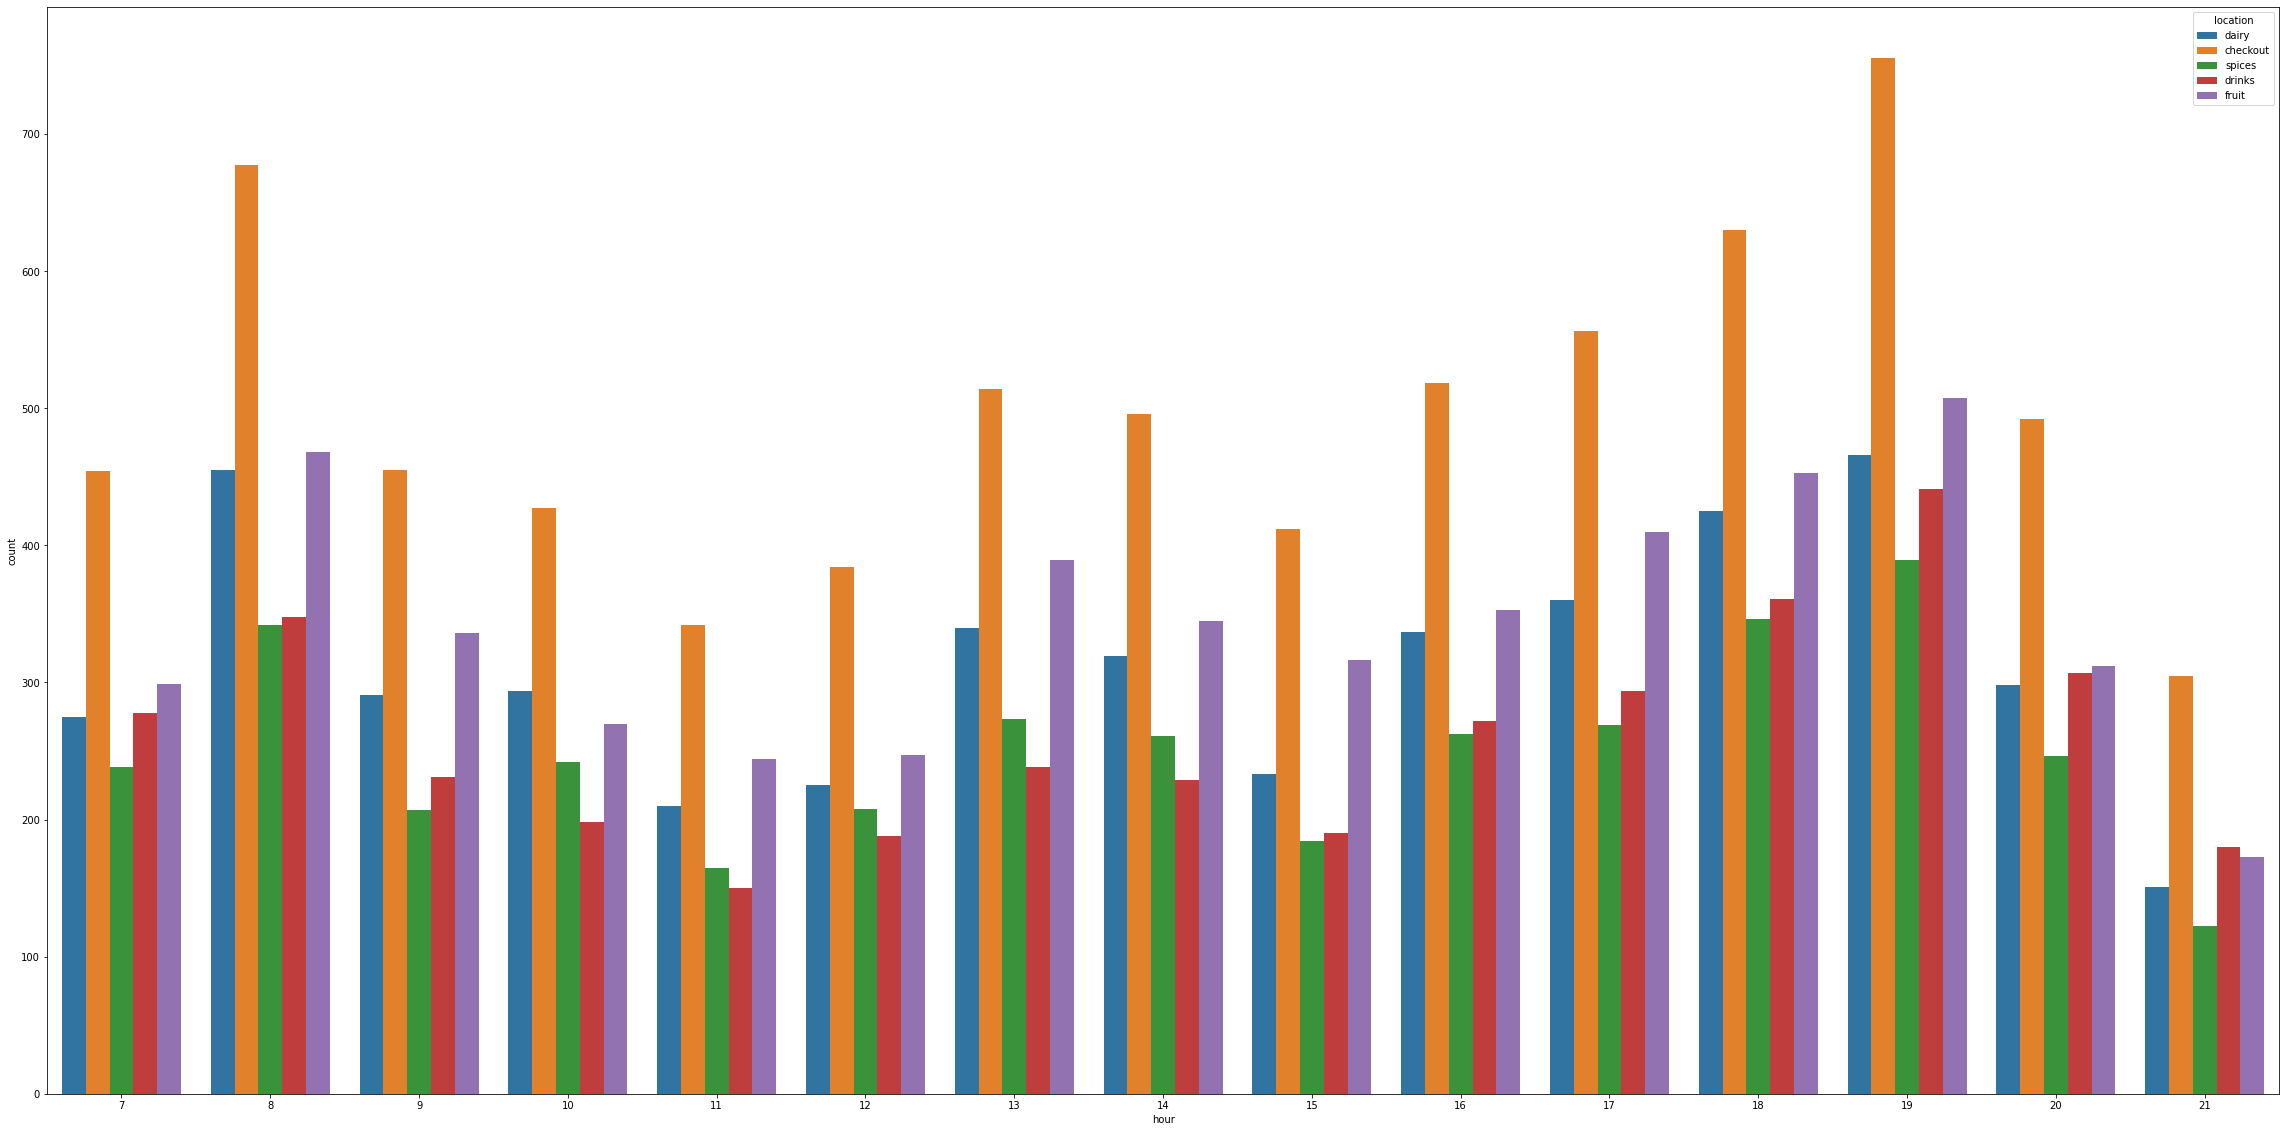

In [ ]:
#Number of customers in different isles based on the hours
plt.figure(figsize=(40,20))
sns.countplot(data=week, x='hour', hue='location')
plt.show()

- From the bove graph, we  observe the number of customer usually at morning early hours (7-8) more and again in evening hours (17-19). A usual pattern it could be for a general store

In [ ]:
#Simulation of a supermarket.

STATES = ('fruit', 'spices', 'dairy', 'drinks', 'checkout')

PROBS = {
        'checkout': (1.000000, 0.000000, 0.000000, 0.000000, 0.000000),
         'dairy'  : (0.390124, 0.001283, 0.222745, 0.190252, 0.195596),
         'drinks' : (0.536748, 0.027145, 0.000000, 0.219206, 0.216901),
         'fruit': (0.498926, 0.238039, 0.136887, 0.000391, 0.125757),
         'spices': (0.250733, 0.323741, 0.272848, 0.152411, 0.000266),
}

NEW_CUSTOMERS_PER_MINUTE = 3 

SIMULATE_MINUTES = 60 * 14

In [ ]:
#Desining the customer class
class Customer:
    """Customer moves from aisle to aisle
    Initial state is fruit"""

    def __init__(self, id):
        self.id = id
        self.state = 'fruit'

    def next_state(self):
        """performs a weighted random choice, refered to transition matrix"""
        self.state = random.choices(STATES, weights=PROBS[self.state])[0]

    @property
    def active(self):
        return self.state != 'checkout'

    def __repr__(self):
        """formats as CSV"""
        return f"{self.id}, {self.state}"

In [ ]:
#Defining the Supermarket class
class Supermarket:
    """Simulation of  multiple customers"""

    def __init__(self, name):
        self.minutes = 0
        self.name = name
        self.customers = []
        self.last_id = 0

    @property
    def n_customers(self):
        return len(self.customers)

    @property
    def time(self):
        hour = 7  + self.minutes // 60
        min = self.minutes % 60
        return f"{hour:02}:{min:02}:00"

    def next_minute(self):
        """propagates each customer"""
        self.minutes += 1
        for c in self.customers:
            c.next_state()
            self.print_row(c)

    def add_new_customers(self):
        """new customers randomly enter the shop"""
        n = np.random.poisson(NEW_CUSTOMERS_PER_MINUTE)
        for i in range(n):
            self.last_id += 1
            c = Customer(self.last_id)
            self.customers.append(c)
            self.print_row(c)

    def remove_exited_customers(self):
        """removes customers that are done shopping"""
        self.customers = [c for c in self.customers if c.active]

    def print_row(self, customer):
        """prints one row of CSV"""
        row = str(self) + ', ' + str(customer)
        print(row)

    def __repr__(self):
        """formats as CSV"""
        return f"{self.time}, {self.name}, {self.n_customers}"

In [ ]:
#Simulation
s = Supermarket("Doodle")
for i in range(SIMULATE_MINUTES):
    s.next_minute()
    s.add_new_customers()
    s.remove_exited_customers()

Streaming output truncated to the last 5000 lines.
17:58:00, Doodle, 30, 1905, fruit
17:58:00, Doodle, 30, 1921, fruit
17:58:00, Doodle, 30, 1928, fruit
17:58:00, Doodle, 30, 1939, checkout
17:58:00, Doodle, 30, 1944, fruit
17:58:00, Doodle, 30, 1950, spices
17:58:00, Doodle, 30, 1951, spices
17:58:00, Doodle, 30, 1955, checkout
17:58:00, Doodle, 30, 1957, spices
17:58:00, Doodle, 30, 1959, checkout
17:58:00, Doodle, 30, 1960, fruit
17:58:00, Doodle, 30, 1961, spices
17:58:00, Doodle, 30, 1963, drinks
17:58:00, Doodle, 30, 1965, spices
17:58:00, Doodle, 30, 1967, dairy
17:58:00, Doodle, 30, 1969, drinks
17:58:00, Doodle, 30, 1972, fruit
17:58:00, Doodle, 30, 1973, fruit
17:58:00, Doodle, 30, 1974, drinks
17:58:00, Doodle, 30, 1975, fruit
17:58:00, Doodle, 30, 1977, dairy
17:58:00, Doodle, 30, 1978, spices
17:58:00, Doodle, 30, 1979, dairy
17:58:00, Doodle, 30, 1980, dairy
17:58:00, Doodle, 30, 1981, fruit
17:58:00, Doodle, 30, 1982, fruit
17:58:00, Doodle, 30, 1983, dairy
17:58:00, Doo